## Can you predict heart disease in patients?

### Initialize

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
dfHeartDs = pd.read_csv('heart_disease.csv')

In [3]:
dfHeartDs.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Clean Data

In [4]:
# We can see that there is no data to be cleaned
dfHeartDs.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dfHeartDs.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Split into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# Since all variables are numerical, we must check for uniqueness to retrieve categorical data
for col in dfHeartDs:
    print(col, "has", dfHeartDs[col].nunique(), "unique values")

age has 41 unique values
sex has 2 unique values
cp has 4 unique values
trestbps has 49 unique values
chol has 152 unique values
fbs has 2 unique values
restecg has 3 unique values
thalach has 91 unique values
exang has 2 unique values
oldpeak has 40 unique values
slope has 3 unique values
ca has 5 unique values
thal has 4 unique values
target has 2 unique values


In [8]:
# Select numeric & categorical featues
cols_num = []
cols_cat = []
for col in dfHeartDs:
    if dfHeartDs[col].nunique() <= 5:
        cols_cat.append(col)
    else:
        cols_num.append(col)
        
cols_cat.remove('target')
print(cols_num)
print(cols_cat)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [9]:
# Select features
X = dfHeartDs.drop(['target'], axis=1)
# Select target
y = dfHeartDs.loc[:,['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Label encoding only categorical features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Xle_train = X_train.copy()
Xle_test = X_test.copy()

label_encoder = LabelEncoder()

for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])    
    Xle_test[col] = label_encoder.transform(X_test[col])

### Exploratory Data Analysis

<AxesSubplot:>

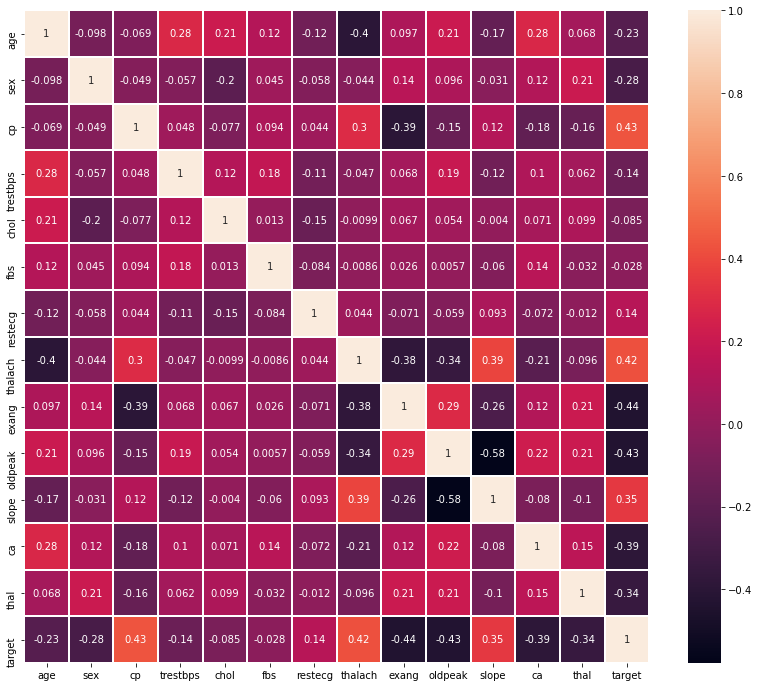

In [11]:
# Correlation heat map
plt.subplots(figsize=(14, 12))
sns.heatmap(dfHeartDs.corr(),annot=True,lw=1)

In [12]:
# Create dataframe to showcase results
res = {'Model Name':  [],
        'Accuracy (before tuning)': [],
        'Accuracy (after tuning)': [],
        'Improvement percentage': []
        }

### Build and Tune Models

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def get_accuracy(model, X_trn, X_tst, y_trn, y_tst):
    model.fit(X_trn, y_trn)
    y_tst_prd = model.predict(X_tst)
    test_score = accuracy_score(y_tst, y_tst_prd) * 100
    return test_score

In [14]:
# Naive Bayes Classifier (Using Gaussian dist)

from sklearn.naive_bayes import GaussianNB

mdlGnHD = GaussianNB()
accuracyMdlGnHD = get_accuracy(mdlGnHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Gaussian Naive Bayes Classifier is", round(accuracyMdlGnHD,2))
res['Model Name'].append("Gaussian Naive Bayes")
res['Accuracy (before tuning)'].append(str(round(accuracyMdlGnHD,2))+"%")

The accuracy for Gaussian Naive Bayes Classifier is 86.89


In [15]:
# Naive Bayes Tuning

mdlGnHD.get_params()

from sklearn.model_selection import GridSearchCV

param_dict = {
    'var_smoothing': np.logspace(0, -11, num=100) # Return numbers spaced evenly on a log scale
}

# define
mdlGnHD = GaussianNB()
# tune
mdlGnHD = GridSearchCV(estimator=mdlGnHD, param_grid=param_dict, cv=10)
# fit
mdlGnHD.fit(Xle_train[cols_cat+cols_num], y_train)

print("Best parameters:", mdlGnHD.best_params_)
print("Best estimator:", mdlGnHD.best_estimator_)
print("Best score:", mdlGnHD.best_score_)

# predict
tunedAccuracyMdlGnHD = get_accuracy(mdlGnHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Gaussian Naive Bayes Classifier Tuned is", round(tunedAccuracyMdlGnHD, 2))
res['Accuracy (after tuning)'].append(str(round(tunedAccuracyMdlGnHD,2))+"%")
impPg = tunedAccuracyMdlGnHD - accuracyMdlGnHD
res['Improvement percentage'].append(str(round(impPg, 2))+"%")

Best parameters: {'var_smoothing': 4.641588833612782e-05}
Best estimator: GaussianNB(var_smoothing=4.641588833612782e-05)
Best score: 0.8096666666666668
The accuracy for Gaussian Naive Bayes Classifier Tuned is 88.52


In [16]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

mdlKnHD = KNeighborsClassifier()
accuracyMdlKnHD = get_accuracy(mdlKnHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for K-Nearest Neighbors Classifier is", round(accuracyMdlKnHD,2))
res['Model Name'].append("K-Nearest Neighbors")
res['Accuracy (before tuning)'].append(str(round(accuracyMdlKnHD,2))+"%")

The accuracy for K-Nearest Neighbors Classifier is 68.85


In [17]:
# K-Nearest Neighbors Tuning
mdlKnHD.get_params()

param_dict = {
    "leaf_size": list(range(1,50)),
    "n_neighbors": list(range(1,30)),
    "p": [1,2]
}

# define
mdlKnHD = KNeighborsClassifier()
# tune
mdlKnHD = GridSearchCV(estimator=mdlKnHD, param_grid=param_dict, cv=10, n_jobs=-1)
# fit
mdlKnHD.fit(Xle_train[cols_cat+cols_num], y_train)

print("Best parameters:", mdlKnHD.best_params_)
print("Best estimator:", mdlKnHD.best_estimator_)
print("Best score:", mdlKnHD.best_score_)

# predict
tunedAccuracyMdlKnHD = get_accuracy(mdlKnHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for K-Nearest Neighbors Classifier Tuned is", round(tunedAccuracyMdlKnHD,2))
res['Accuracy (after tuning)'].append(str(round(tunedAccuracyMdlKnHD,2))+"%")
impPg = tunedAccuracyMdlKnHD - accuracyMdlKnHD
res['Improvement percentage'].append(str(round(impPg, 2))+"%")


Best parameters: {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
Best estimator: KNeighborsClassifier(leaf_size=1, p=1)
Best score: 0.7023333333333334
The accuracy for K-Nearest Neighbors Classifier Tuned is 70.49


In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

mdlDtHD = DecisionTreeClassifier(random_state=1)
accuracyMdlDtHD = get_accuracy(mdlDtHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Decision Tree Classifier is", round(accuracyMdlDtHD,2))
res['Model Name'].append("Decision Tree")
res['Accuracy (before tuning)'].append(str(round(accuracyMdlDtHD,2))+"%")

The accuracy for Decision Tree Classifier is 83.61


In [19]:
# Decision Tree Tuning

mdlDtHD.get_params()

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dict = { 
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

# define
mdlDtHD = DecisionTreeClassifier(random_state=1)    
# tune
mdlDtHD = RandomizedSearchCV(estimator=mdlDtHD, param_distributions=param_dict, cv=10, n_jobs=-1)
# fit
mdlDtHD.fit(Xle_train[cols_cat+cols_num], y_train)

print("Best parameters:", mdlDtHD.best_params_)
print("Best estimator:", mdlDtHD.best_estimator_)
print("Best score:", mdlDtHD.best_score_)

# predict
tunedAccuracyMdlDtHD = get_accuracy(mdlDtHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Decision Tree Classifier Tuned is", round(tunedAccuracyMdlDtHD,2))
#res['Accuracy (after tuning)'].append(str(round(tunedAccuracyMdlDtHD,2))+"%")
#impPg = tunedAccuracyMdlDtHD - accuracyMdlDtHD
#res['Improvement percentage'].append(str(round(impPg, 2))+"%")


Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'gini'}
Best estimator: DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=5,
                       random_state=1)
Best score: 0.7896666666666666
The accuracy for Decision Tree Classifier Tuned is 80.33


In [20]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
    
mdlRfsHD =  RandomForestClassifier(random_state=1)
accuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Random Forest Classifier is", round(accuracyMdlRfsHD,2))
res['Model Name'].append("Random Forest")
res['Accuracy (before tuning)'].append(str(round(accuracyMdlRfsHD,2))+"%")


The accuracy for Random Forest Classifier is 85.25


In [21]:
# Random Forest Tuning

mdlRfsHD.get_params()

param_dict = {'n_estimators': list(range(1, 3000, 30)),
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_depth': list(range(1, 10)),
              'min_samples_split': list(range(1,10)),
              'min_samples_leaf': list(range(1,5)),
              'bootstrap': [True, False]
             }

# define
mdlRfsHD = RandomForestClassifier(random_state=1)
# tune
mdlRfsHD = RandomizedSearchCV(estimator=mdlRfsHD, param_distributions=param_dict, cv=10, n_jobs=-1)
# fit
mdlRfsHD.fit(Xle_train[cols_cat+cols_num], y_train)

print("Best parameters:", mdlRfsHD.best_params_)
print("Best estimator:", mdlRfsHD.best_estimator_)
print("Best score:", mdlRfsHD.best_score_)

# predict
tunedAccuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Random Forest Classifier Tuned is", round(tunedAccuracyMdlRfsHD,2))
res['Accuracy (after tuning)'].append(str(round(tunedAccuracyMdlRfsHD,2))+"%")
impPg = tunedAccuracyMdlRfsHD - accuracyMdlRfsHD
res['Improvement percentage'].append(str(round(impPg, 2))+"%")


Best parameters: {'n_estimators': 2791, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}
Best estimator: RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=2791, random_state=1)
Best score: 0.8223333333333335
The accuracy for Random Forest Classifier Tuned is 86.89


In [22]:
# XGBoost Classifier

from xgboost import XGBClassifier

mdlXgbHD = XGBClassifier(random_state=1)
accuracyMdlXgbHD = get_accuracy(mdlXgbHD, Xle_train[cols_cat], Xle_test[cols_cat], y_train, y_test)
print("The accuracy for XGBoost Classifier is", round(accuracyMdlXgbHD,2))
res['Model Name'].append("XGBoost Forest")
res['Accuracy (before tuning)'].append(str(round(accuracyMdlXgbHD,2))+"%")
res['Accuracy (after tuning)'].append("-")
res['Improvement percentage'].append("-")

[00:27:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy for XGBoost Classifier is 88.52


### Try to improve better Random Forest

In [23]:
# Improving Random Forest Classifier

# tweak 'n_estimators' -> conclusion: accuracy is very tight, leave n < 1500
for i in range(1, 3000, 30):
    break
    # define
    mdlRfsHD = RandomForestClassifier(random_state=1, n_estimators=i)
    accuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
    print("N estimators", i, "The accuracy for Random Forest Classifier is", round(accuracyMdlRfsHD,2))

# tweak 'max_depth' -> conclusion: the higher the depth, the lower the accuracy
for i in range(1, 15):
    break
    # define
    mdlRfsHD = RandomForestClassifier(random_state=1, max_depth=i)
    accuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
    print("Max depth", i, "The accuracy for Random Forest Classifier is", round(accuracyMdlRfsHD,2))
    
# tweak 'min_samples_split' -> conclusion: best results are above 50
for i in range(2, 100, 3):
    break
    # define
    mdlRfsHD = RandomForestClassifier(random_state=1, min_samples_split=i)
    accuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
    print("Min samples split", i, "The accuracy for Random Forest Classifier is", round(accuracyMdlRfsHD,2))
    
# tweak 'min_samples_leaf' -> conclusion: above 8 min_samples_leaf, we get a better accuracy, which them becomes constant
for i in range(1, 30):
    break
    # define
    mdlRfsHD = RandomForestClassifier(random_state=1, min_samples_leaf=i)
    accuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
    print("Min samples leaf", i, "The accuracy for Random Forest Classifier is", round(accuracyMdlRfsHD,2))
    
# Let us hyper parameter tune with our new ranges
param_dict = {'n_estimators': list(range(1,50)),
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_depth': list(range(1,5)),
              'min_samples_split': list(range(1,50)),
              'min_samples_leaf': list(range(8,30)),
             }

# define
mdlRfsHD = RandomForestClassifier(random_state=1)
# tune
mdlRfsHD = RandomizedSearchCV(estimator=mdlRfsHD, param_distributions=param_dict, cv=10, n_jobs=-1)
# fit
mdlRfsHD.fit(Xle_train[cols_cat+cols_num], y_train)

print("Best parameters:", mdlRfsHD.best_params_)
print("Best estimator:", mdlRfsHD.best_estimator_)
print("Best score:", mdlRfsHD.best_score_)

# predict
tunedAccuracyMdlRfsHD = get_accuracy(mdlRfsHD, Xle_train[cols_cat+cols_num], Xle_test[cols_cat+cols_num], y_train, y_test)
print("The accuracy for Random Forest Classifier Tuned is", round(tunedAccuracyMdlRfsHD,2))

# Update its accuracy score
res['Accuracy (after tuning)'][3] = str(round(tunedAccuracyMdlRfsHD,2))+"%"
impPg = tunedAccuracyMdlRfsHD - accuracyMdlRfsHD
res['Improvement percentage'][3] = str(round(impPg,2))+"%"

Best parameters: {'n_estimators': 24, 'min_samples_split': 32, 'min_samples_leaf': 29, 'max_features': 'auto', 'max_depth': 2, 'criterion': 'entropy'}
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=29,
                       min_samples_split=32, n_estimators=24, random_state=1)
Best score: 0.8388333333333333
The accuracy for Random Forest Classifier Tuned is 88.52


### Display results

In [24]:
# Append separators values for XGBoost, since it was not tuned
res['Accuracy (after tuning)'].append("-")
res['Improvement percentage'].append("-")
dfRes = pd.DataFrame (res, columns = ['Model Name','Accuracy (before tuning)', 'Accuracy (after tuning)', 'Improvement percentage'])
dfRes

Model Name Accuracy (before tuning) Accuracy (after tuning)  \
0  Gaussian Naive Bayes                   86.89%                  88.52%   
1   K-Nearest Neighbors                   68.85%                  70.49%   
2         Decision Tree                   83.61%                  86.89%   
3         Random Forest                   85.25%                  88.52%   
4        XGBoost Forest                   88.52%                       -   

  Improvement percentage  
0                  1.64%  
1                  1.64%  
2                  1.64%  
3                  3.28%  
4                      -

### Evaluate Random Forest Classifier Model - Confusion Matrix

In [25]:
# "Retrieve" the model
mdlRfsHD.fit(Xle_train[cols_cat+cols_num], y_train)
y_test_pred = mdlRfsHD.predict(Xle_test[cols_cat+cols_num])

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

[[25  4]
 [ 4 28]]


#### According to the confusion matrix, from our 61 evaluated cases we predicted 28 cases CORRECTLY where the patient has the disease, and 25 cases also CORRECTLY where the patient does not have the disease. Great results!

### Alejandro Gleason MÃ©ndez - ag77698